<a href="https://colab.research.google.com/github/RafsanJany-44/Machine-School/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Principal Component Analysis is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. 
Each of the principal components is chosen in such a way so that it would describe most of them still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has a maximum variance.
 

Uses of PCA: 

It is used to find inter-relation between variables in the data.
It is used to interpret and visualize data.
The number of variables is decreasing it makes further analysis simpler.
It’s often used to visualize genetic distance and relatedness between populations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/data%20for%20MEGA/MEGA_20f.csv'
dataset = pd.read_csv(data)
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [2]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2) # number of features after PCA
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
 
explained_variance = pca.explained_variance_ratio_
print("Shape of train:",X_train.shape)
print("Shape of train:",X_test.shape)

Shape of train: (72662, 2)
Shape of train: (35789, 2)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier()
KNN_class.fit(X, y)
y_pred=KNN_class.predict(X_test)

ValueError: ignored

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[    0     0  3907     0     0]
 [    0     0 12971     0     0]
 [    0     0  7007     0     0]
 [    0     0  5513     0     0]
 [    0     0  6390     0     1]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          N1       0.00      0.00      0.00      3907
          N2       0.00      0.00      0.00     12971
          N3       0.20      1.00      0.33      7007
           R       0.00      0.00      0.00      5513
           W       1.00      0.00      0.00      6391

    accuracy                           0.20     35789
   macro avg       0.24      0.20      0.07     35789
weighted avg       0.22      0.20      0.06     35789

Accurecy:  0.1958143563664813


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(cm)

[[1069 1361  178  481  818]
 [1982 7036 2118 1060  775]
 [ 557 3069 2883  216  282]
 [1301 2304  367  977  564]
 [1557 1604  273  391 2566]]


ValueError: ignored

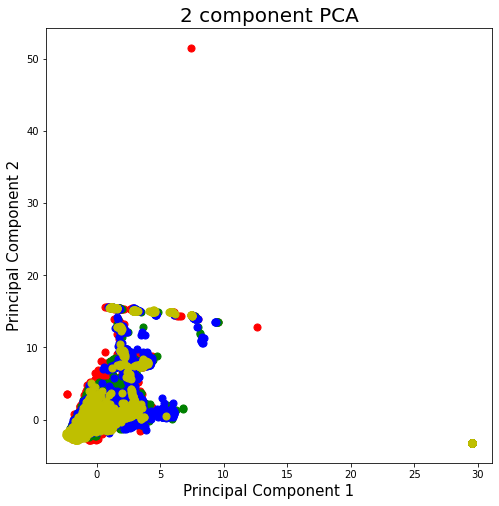

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# load dataset into Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/data%20for%20MEGA/MEGA_20f.csv')

from sklearn.preprocessing import StandardScaler
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])


finalDf = pd.concat([principalDf, df[['Sleep_Stage']]], axis = 1)


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['W','N1','N2','N3','R']
colors = ['r', 'g', 'b','y','p']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Sleep_Stage'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


pca.explained_variance_ratio_
